**Laboratorio de Métodos Cuantitativos Aplicados a la Gestión**

---

# **Clase 17 -  📊 Introducción al análisis de inversiones con Python (II)**

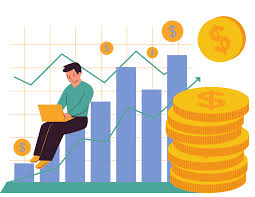

# 📐 Seguimos con las formulas:




6.   Tasa interna de retorno (TIR)
7.   Tasa interna de retorno modificada (TIRM)
8.   Indice de rentabilidad (IR)
9.   Periodo de recuperacion simple (PRS)
10.   Periodo de recuperacion descontado (PRD)

---











### ***6) Tasa Interna de Retorno (TIR)***

La Tasa Interna de Retorno (TIR) es la tasa de descuento que hace que el Valor Actual Neto (VAN) de todos los flujos de caja de un proyecto de inversión sea igual a cero. Representa la rentabilidad intrínseca del proyecto.

**La fórmula es implícita y generalmente requiere métodos iterativos para su cálculo:**

$$
\sum_{t=0}^{n} \frac{F_t}{(1+TIR)^t} = 0
$$

Donde:

-$ F_t $: Flujo de caja en el período \( t \)
- $ TIR $: Tasa Interna de Retorno
- $ t $: Período de tiempo
- $ n $: Número total de períodos

**Interpretación de la TIR:**

- Si **TIR > r** (Tasa de descuento o costo de capital): El proyecto es rentable y conviene aceptarlo.
- Si **TIR < r**: El proyecto no es rentable y no conviene aceptarlo.
- Si **TIR = r**: El proyecto es indiferente.

# Caso NVDA 🤖

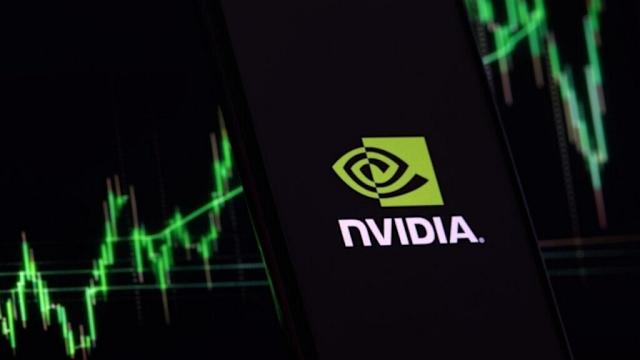

In [ ]:
import yfinance as yf #traemos info del mercado 15´ retrasados
import pandas as pd

#ticker de la empresa a analizar
ticker_symbol = "NVDA" #Podemos analizar cualquier empresa que cotize en el mercado

# Descargar la info del mercado
ticker_data = yf.Ticker(ticker_symbol)
df = ticker_data.history(period="5y") # Se puede ajustar el periodo de analisis.
display(df.head())

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-10-26 00:00:00-04:00,13.386136,13.651077,12.998818,13.101255,336896000,0.0,0.0
2020-10-27 00:00:00-04:00,13.265505,13.401092,13.151354,13.355980,250520000,0.0,0.0
2020-10-28 00:00:00-04:00,13.157835,13.219646,12.570628,12.588573,376520000,0.0,0.0
2020-10-29 00:00:00-04:00,12.799429,13.152601,12.711198,12.984365,320080000,0.0,0.0
2020-10-30 00:00:00-04:00,12.810892,12.897128,12.262565,12.495853,416820000,0.0,0.0


In [ ]:
#Nos quedamos con el cierre de la fecha
df_selected = df[['Close']]
display(df_selected.head())

,Close
Date,
2020-10-26 00:00:00-04:00,13.101255
2020-10-27 00:00:00-04:00,13.355980
2020-10-28 00:00:00-04:00,12.588573
2020-10-29 00:00:00-04:00,12.984365
2020-10-30 00:00:00-04:00,12.495853


In [ ]:
df_selected['Year'] = df_selected.index.year
df_PROMAÑO = df_selected.groupby('Year')['Close'].mean().reset_index()


df_PROMAÑO.columns = ['Año', 'Promedio de Cierre de Acción']
display(df_PROMAÑO)

/tmp/ipython-input-1904090759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Year'] = df_selected.index.year


,Año,Promedio de Cierre de Acción
0,2020,13.221846
1,2021,19.479191
2,2022,18.540146
3,2023,36.544537
4,2024,107.786020
5,2025,146.298015


In [ ]:
#  nueva columna 'cantidad de acciones compradas' todo valor 0
df_PROMAÑO['cantidad de acciones compradas'] = 0

# excepto el primer elemento
df_PROMAÑO.loc[0, 'cantidad de acciones compradas'] = 10
display(df_PROMAÑO)

,Año,Promedio de Cierre de Acción,cantidad de acciones compradas
0,2020,13.221846,10
1,2021,19.479191,0
2,2022,18.540146,0
3,2023,36.544537,0
4,2024,107.786020,0
5,2025,146.298015,0


In [ ]:

# Calcular la inversión inicial para el Año 0
initial_investment = -df_PROMAÑO.loc[0, 'Promedio de Cierre de Acción'] * df_PROMAÑO.loc[0, 'cantidad de acciones compradas']


# Agregar la columna 'Flujo' e inicializarla con ceros
df_PROMAÑO['Flujo'] = 0


# Establecer el flujo para el Año 0 como la inversión inicial
df_PROMAÑO.loc[0, 'Flujo'] = initial_investment
# Calcular el flujo de caja para los años subsiguientes

# Para los años intermedios, el flujo es el cambio en el valor de la inversión
df_PROMAÑO['Flujo'] = df_PROMAÑO['Promedio de Cierre de Acción'].diff() * df_PROMAÑO['cantidad de acciones compradas'].iloc[0]



# El flujo en el año 0 es la inversión inicial
df_PROMAÑO.loc[0, 'Flujo'] = initial_investment


# En el último año, el flujo es el valor de la inversión (venta de acciones)
df_PROMAÑO.loc[df_PROMAÑO.index[-1], 'Flujo'] = df_PROMAÑO.loc[df_PROMAÑO.index[-1], 'Promedio de Cierre de Acción'] * df_PROMAÑO['cantidad de acciones compradas'].iloc[0]
display(df_PROMAÑO)

/tmp/ipython-input-1635302698.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-132.21846397886884' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_PROMAÑO.loc[0, 'Flujo'] = initial_investment


,Año,Promedio de Cierre de Acción,cantidad de acciones compradas,Flujo
0,2020,13.221846,10,-132.218464
1,2021,19.479191,0,62.573448
2,2022,18.540146,0,-9.390449
3,2023,36.544537,0,180.043911
4,2024,107.786020,0,712.414827
5,2025,146.298015,0,1462.980153


In [ ]:
!pip install numpy_financial

###  ¿Qué es `numpy-financial`?

`numpy-financial` es una librería de Python que reúne funciones financieras comunes, separada de NumPy para mantenerla enfocada en cálculos numéricos generales. Permite realizar:

*   **Cálculos de valor presente y futuro** (por ejemplo, `npf.pv()`, `npf.fv()`), útiles para valorar inversiones.
*   **Análisis de flujos de caja** (por ejemplo, `npf.irr()`, `npf.npv()`), esenciales para evaluar la rentabilidad de proyectos.
*   **Cálculos de anualidades**, aplicables a préstamos, hipotecas o planes de ahorro.
*   **Operaciones básicas con bonos y valores**.

En síntesis, es una herramienta práctica para realizar cálculos financieros de forma eficiente, especialmente al trabajar con grandes conjuntos de datos numéricos. 📊

In [ ]:
#Dataframe ready para utilizar con nuestras herramientas ;)
display(df_PROMAÑO)

,Año,Promedio de Cierre de Acción,cantidad de acciones compradas,Flujo
0,2020,13.221846,10,-132.218464
1,2021,19.479191,0,62.573448
2,2022,18.540146,0,-9.390449
3,2023,36.544537,0,180.043911
4,2024,107.786020,0,712.414827
5,2025,146.298015,0,1462.980153


In [ ]:
import numpy_financial as nf

# Calculamos tir
tir = nf.irr(df_PROMAÑO['Flujo'])
print(f"La Tasa Interna de Retorno (TIR) es: {tir:.2%}")

La Tasa Interna de Retorno (TIR) es: 103.98%


In [ ]:
# Calcular el cambio porcentual anual en el precio de cierre promedio
df_PROMAÑO['Annual_Price_Change'] = df_PROMAÑO['Promedio de Cierre de Acción'].pct_change()
display(df_PROMAÑO)

# También puedes calcular el cambio de precio anual promedio (excluyendo el primer valor NaN)
average_annual_price_change = df_PROMAÑO['Annual_Price_Change'].dropna().mean()
print(f"promedio de cambio de precios: {average_annual_price_change:}")

,Año,Promedio de Cierre de Acción,cantidad de acciones compradas,Flujo,Annual_Price_Change
0,2020,13.221846,10,-132.218464,NaN
1,2021,19.479191,0,62.573448,0.473258
2,2022,18.540146,0,-9.390449,-0.048208
3,2023,36.544537,0,180.043911,0.971103
4,2024,107.786020,0,712.414827,1.949443
5,2025,146.298015,0,1462.980153,0.357300


promedio de cambio de precios: 0.740579317079295


Como podemos observar en este caso, TIR > r (En este caso considereandolo como el promedio de cambio de precios año a año). Podemos considerar que la inversion es rentable.

---

### ***7) Tasa Interna de Retorno Modificada (TIRM)***

La Tasa Interna de Retorno Modificada (TIRM) aborda una de las críticas de la TIR tradicional: la suposición de que los flujos de caja intermedios se reinvierten a la propia TIR. La TIRM asume que los flujos de caja positivos se reinvierten a una tasa de reinversión específica (generalmente el costo de capital), y los flujos de caja negativos se descuentan al costo de financiamiento.

**Fórmula de la TIRM:**

$$
TIRM = \left( \frac{VF_{positivos}}{VP_{negativos}} \right)^{\frac{1}{n}} - 1
$$

Donde:

- $ VF_{positivos} $: Valor futuro de los flujos de caja positivos (reinvertidos a la tasa de reinversión).
- $ VP_{negativos} $: Valor presente de los flujos de caja negativos (descontados al costo de financiamiento).
- $ n $: Número total de períodos.

**Interpretación de la TIRM:**

- Si **TIRM > r** (Tasa de reinversión/costo de capital): El proyecto es rentable y conviene aceptarlo.
- Si **TIRM < r**: El proyecto no es rentable y no conviene aceptarlo.
- Si **TIRM = r**: El proyecto es indiferente.

In [ ]:
import numpy_financial as npf
tirm_result = npf.mirr(df_PROMAÑO['Flujo'].tolist(), 0.73, 0.73) # (FLUJO, TASA DE FINANCIAMIENTO,  TASA DE REINVERSION)

print("La Tasa interna de Retorno Modificada es :", tirm_result*100)

La Tasa interna de Retorno Modificada es : 94.7791538488372


TIRM > R. Es rentable

---

### ***8) Índice de Rentabilidad (IR)***

El Índice de Rentabilidad (IR), también conocido como relación beneficio/costo, mide el valor presente de los flujos de caja futuros generados por un proyecto por cada unidad monetaria invertida. Se calcula dividiendo el valor presente de los flujos de caja futuros (excluyendo la inversión inicial) entre el valor presente de la inversión inicial.

**Fórmula del IR:**

$$
IR = \frac{VAN}{\text{Inversión inicial}}
$$


Donde:

- $ VAN $: Valor actual neto
- $ I_0 $: Inversión inicial (tomada en valor absoluto y traída a valor presente si ocurre en un período > 0)

**Interpretación del IR:**

- Si **IR > 1**: El valor presente de los beneficios es mayor que la inversión inicial, el proyecto es rentable. Conviene aceptar el proyecto.
- If **IR < 1**: El valor presente de los beneficios es menor que la inversión inicial, el proyecto no es rentable. No conviene aceptar el proyecto.
- If **IR = 1**: El valor presente de los beneficios es igual a la inversión inicial, el proyecto es indiferente.

In [ ]:
import numpy_financial as nf

# Tasa de descuento de capital R
r_desc_ir = 0.73

# Flujo
flujos_ir = df_PROMAÑO['Flujo'].tolist()

# Separo Inversion inicial y flujos futuros
I_inicial = abs(flujos_ir[0])

# VAN
van = nf.npv(r_desc_ir, flujos_ir)
# Indice de rentabilidad
ir = van / I_inicial
print(f"El Índice de Rentabilidad (IR) es: {ir:.2f}")

El Índice de Rentabilidad (IR) es: 0.83


IR < 1 no rentable

---

### ***9) Periodo de Recuperación Simple (PRS)***

El Periodo de Recuperación Simple (PRS) es el tiempo que tarda un proyecto de inversión en recuperar la inversión inicial con los flujos de caja brutos (sin descontar). Es una medida de liquidez, no de rentabilidad.

**Cálculo del PRS:**

Se calcula sumando los flujos de caja anuales hasta que la suma sea igual o mayor que la inversión inicial. Si la recuperación ocurre dentro de un año, se puede interpolar linealmente.

**Interpretación del PRS:**

Generalmente, se compara con un período de recuperación máximo aceptable definido por la empresa. Proyectos con PRS más cortos suelen ser preferibles, ya que recuperan la inversión más rápido, aunque no considera la rentabilidad después del período de recuperación ni el valor del dinero en el tiempo.

In [ ]:
#flujos como una lista
flujos_prs = df_PROMAÑO['Flujo'].tolist()

#inversión inicial
I_inicial = abs(flujos_prs[0])

# Inicializar variables para el flujo de caja acumulado y el período de recuperación
cumulative_cash_flow = 0 #el flujo de caja acumulativo comienza en 0
prs = None

# luego , Iterar a través de los flujos de caja comenzando desde el primer período (después de la inversión inicial)
for t in range(1, len(flujos_prs)):
    cumulative_cash_flow += flujos_prs[t]

    # Verificar si el flujo de caja acumulado es mayor o igual a la inversión inicial
    if cumulative_cash_flow >= I_inicial:
        # Si es así, calcular el período de recuperación
        # El período de recuperación es el período actual 't' más la fracción del flujo del último período necesaria para cubrir la inversión restante
        remaining_investment = I_inicial - (cumulative_cash_flow - flujos_prs[t])
        prs = t - 1 + (remaining_investment / flujos_prs[t])
        break

# Mostrar el Periodo de Recuperación Simple (PRS) calculado
if prs is not None:
    print(f"El Periodo de Recuperación Simple (PRS) es: {prs:.2f} años")
else:
    print("La inversión inicial no se recupera dentro del período del análisis.")

El Periodo de Recuperación Simple (PRS) es: 2.44 años


Si yo compro las acciones luego de 2 años y medio practicamente, estaria recuperando mi inversion Inicial.

---

### ***10) Periodo de Recuperación Descontado (PRD)***

El Periodo de Recuperación Descontado (PRD) es similar al PRS, pero utiliza los flujos de caja descontados para calcular el tiempo que tarda en recuperarse la inversión inicial. Esta métrica sí considera el valor del dinero en el tiempo.

**Cálculo del PRD:**

Se calcula sumando los flujos de caja descontados anualmente hasta que la suma sea igual o mayor que la inversión inicial.

**Interpretación del PRD:**

Al igual que el PRS, se compara con un período de recuperación máximo aceptable. El PRD siempre será mayor que el PRS (o igual si la tasa de descuento es cero). Proyectos con PRD más cortos son generalmente preferibles, pero sigue sin considerar la rentabilidad después del período de recuperación.

In [ ]:
# Definir la tasa de descuento (usando la misma tasa que para VAN/IR)
r_desc_prd = r_desc_ir

# Obtener los flujos de caja como una lista
flujos_prd = df_PROMAÑO['Flujo'].tolist()

# Obtener la inversión inicial (valor absoluto del primer flujo de caja)
I_inicial = abs(flujos_prd[0])

# Misma historia
cumulative_discounted_cash_flow = 0
prd = None

# Misma historia
for t in range(1, len(flujos_prd)):
    # Descontar el flujo de caja actual
    discounted_flow = flujos_prd[t] / (1 + r_desc_prd)**t # aaaaa pero aca cambia se descuentan los flujos periodo periodo por la tasa de costo de capital.
    cumulative_discounted_cash_flow += discounted_flow

    # Verificar si el flujo de caja descontado acumulado es mayor o igual a la inversión inicial
    if cumulative_discounted_cash_flow >= I_inicial:
        # Si es así, calcular el período de recuperación descontado
        # El período de recuperación descontado es el período actual 't' más la fracción del flujo descontado del último período necesaria para cubrir la inversión restante
        remaining_investment = I_inicial - (cumulative_discounted_cash_flow - discounted_flow)
        prd = t - 1 + (remaining_investment / discounted_flow)
        break

if prd is not None:
    print(f"El Periodo de Recuperación Descontado (PRD) es: {prd:.2f} años")
else:
    print("La inversión inicial no se recupera dentro del período del análisis descontado.")

El Periodo de Recuperación Descontado (PRD) es: 3.81 años


---

In [ ]:
!pip install numpy_financial

numpy financial es un atajo por que no lo usamos??

| Tipo de cálculo               | ¿Disponible en `numpy-financial`? |
| ----------------------------- | :-------------------------------: |
| Equivalencia                  |                 ❌                 |
| Proporción                    |                 ❌                 |
| Valor Presente (PV)           |                 ✅                 |
| Valor Futuro (FV)             |                 ✅                 |
| Valor Actual Neto (VAN / NPV) |                 ✅                 |
| TIR                           |                 ✅                 |
| TIRM                          |                 ✅                 |
| Índice de Rentabilidad (IR)   |        ❌        |
| PRS                           |             ❌            |
| PRD                           |     ❌      |


Pueden utilizar atajos en vez de hacer toooda las ecuaciones, los ejemplos son de la clase de hoy. pero la clase pasada hay muchas de las ecuaciones que son sencillas de hacer en con numpy financial y nos ahorran tiempo.

* VAN

In [ ]:
import numpy_financial as nf

# Definir la tasa de descuento (usando la misma tasa que para el PRD)
tasa_descuento_van = r_desc_prd

# Obtener los flujos de caja como una lista
flujos_van = df_PROMAÑO['Flujo'].tolist()

# npf.npv(tasa, valores) calcula el valor presente neto de una serie de flujos de caja periódicos.
# El primer valor en la lista 'valores' es el flujo de caja en el momento 0.
resultado_van = nf.npv(tasa_descuento_van, flujos_van)
print(f"El Valor Presente Neto (VAN/NPV) de los flujos de NVDA es: {resultado_van:.2f}")

El Valor Presente Neto (VAN/NPV) de los flujos de NVDA es: 126.32


* Valor presente

In [ ]:
flujo = 1000
periodos = 5
tasa = 0.1

vp = nf.pv(rate=tasa, nper=periodos, pmt=flujo, fv=0, when='end') #fv=0 porque no hay valor futuro establecido , los pagos se reciben al final dado que son acciones, end.
print(f"Valor Presente (VP) de la anualidad: {abs(vp):.2f}")

Valor Presente (VP) de la anualidad: 3790.79


* Valor futuro

In [ ]:
flujo = 1000
periodos = 5
tasa = 0.1

vf = nf.fv(rate=tasa, nper=periodos, pmt=flujo, pv=0, when='end') #pv=0 porque no hay valor presente establecido , los pagos se reciben al final dado que son acciones, end.
print(f"Valor Futuro (VF) de la anualidad: {abs(vf):.2f}")

Valor Futuro (VF) de la anualidad: 6105.10


## Resumen breve de Valor Presente (VP) y Valor Futuro (VF)

Estas son operaciones de equivalencia temporal aplicadas a flujos de dinero concretos, no a tasas. Sirven para llevar flujos de efectivo en el tiempo a un punto común (presente o futuro).

**Ejemplo:**

💡 Querés saber cuánto valen hoy (VP) o cuánto valdrán en 5 años (VF) pagos de 1000 $ anuales al 10%.

### Cálculo del Valor Presente (VP):

La fórmula general para el Valor Presente de una serie de flujos desiguales es:

$$
VP = \sum_{t=1}^{n} \frac{F_t}{(1+r)^t}
$$

Para una anualidad (pagos iguales), se puede usar la fórmula simplificada o `numpy_financial.pv()`:

$$
VP_{anualidad} = PMT \times \frac{1 - (1+r)^{-n}}{r}
$$

### Cálculo del Valor Futuro (VF):

La fórmula general para el Valor Futuro de una serie de flujos desiguales es más compleja y depende del momento en que ocurren los flujos. Para una anualidad (pagos iguales), se puede usar la fórmula simplificada o `numpy_financial.fv()`:

$$
VF_{anualidad} = PMT \times \frac{(1+r)^n - 1}{r}
$$

* Estas fórmulas te “trasladan dinero en el tiempo”. No cambian la tasa, sino que usan la tasa dada para traer o llevar montos.

## Resumen Breve de Equivalencia y Proporción de Tasas

Estas son operaciones entre tasas de interés, no entre flujos. Sirven para convertir tasas que están expresadas en distintos períodos o bases (por ejemplo, de mensual a anual, o de nominal a efectiva).

** Ejemplo:**

💡Si tenés una tasa mensual del 2 %, su equivalente anual efectiva es:

$$
Tasa Anual Efectiva = (1 + Tasa\ Mensual)^{12} - 1 = (1+0.02)^{12} - 1 \approx 0.2682 = 26.82\%
$$

O, al revés, si tenés una tasa efectiva anual del 26.82 %, la mensual equivalente es:

$$
Tasa Mensual Equivalente = (1 + Tasa\ Anual\ Efectiva)^{1/12} - 1 = (1+0.2682)^{1/12} - 1 \approx 0.02 = 2\%
$$

* Es decir, la equivalencia de tasas transforma una tasa en otra que produce el mismo efecto financiero, pero en distinto período. La proporción de tasas (que no se mostró en el ejemplo pero es relevante) simplemente escala una tasa nominal a diferentes períodos sin considerar la capitalización (por ejemplo, una tasa nominal anual del 12% pagadera mensualmente sería 1% mensual simple, 12%/12).

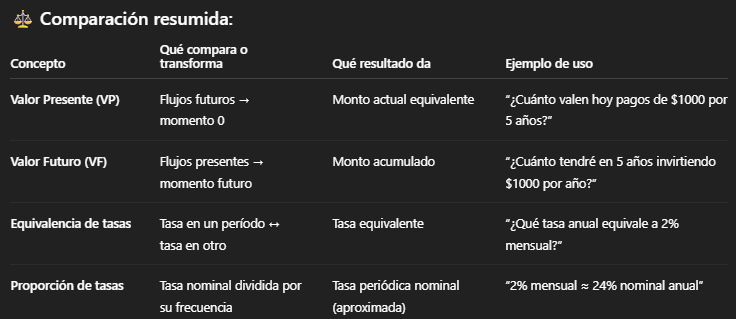

---

In [ ]:
#@title Easter egg 🥚
from IPython.display import Image
Image(url='https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExcmVndm5ma3hyajA5NncwbTQ5azRsbXY5dHlvamQ2bXJuZDRwdnF4aiZlcD12MV9naWZzX3NlYXJjaCZjdD1n/Rlwz4m0aHgXH13jyrE/giphy.gif')

#Ejercicios


Recomendaciones
